#Random Forest Regression Test

In [50]:
import numpy as np
import pandas as pd
import qgrid

import sklearn as skl
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score, train_test_split

Let's load the data and convert it to a dataframe

In [25]:
dataset['DESCR']

"Boston House Prices dataset\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n        - PTRATIO  pupil-teac

In [28]:
dataset = load_boston()
dataDF = pd.DataFrame(dataset['data'], columns=['Crime','Zoned','Industry','BoundsCharles','NitrOx','Rooms','Age','DistBusiness','Highway','Tax','PupTeacherRatio','BlackInfo','LowerStat'])
dataDF.shape

(506, 13)

Separating our independent from our dependent variables:

In [23]:
np.mean(dataset['target'])

22.532806324110677

In [31]:
XFull = dataDF.copy()
yFull = dataset.target

totalSamples = XFull.shape[0]
totalFeature = XFull.shape[1]

Let's create train/test data:

In [142]:
trainMask = np.random.rand(len(XFull)) < 0.8

XTrain, yTrain = XFull[trainMask], yFull[trainMask]
XTest, yTest = XFull[~trainMask], yFull[~trainMask]

Let's create a classified for the random forest regression:

In [143]:
independentVars = ['Crime','Zoned','Industry','BoundsCharles','NitrOx','Rooms','Age','DistBusiness','Highway','Tax','PupTeacherRatio','BlackInfo','LowerStat']

rfr = RandomForestRegressor(n_estimators=30)
rfr.fit(XTrain[independentVars], yTrain)

r2 = skl.metrics.r2_score(yTest, rfr.predict(XTest[independentVars]))
print 'R^2 Value: ' + str(r2)

RMSECV = np.sqrt(np.mean((yTest - rfr.predict(XTest[independentVars])) **2))
RMSECV

R^2 Value: 0.850027939449


3.6715810888917715

Let's look at the graph of crime vs. median house value:

In [114]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 8,8

matplotlib.rc('font', **{'size': 20})

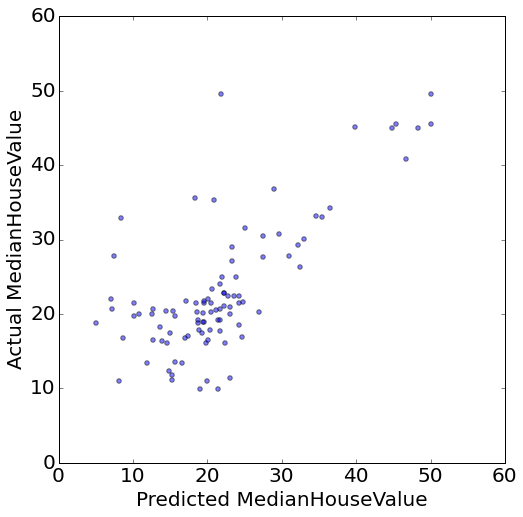

In [121]:
colors = XTest[['BoundsCharles']].applymap(lambda x: 0.1 if x == 1 else 0.233).values


fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('Predicted MedianHouseValue')
ax.set_ylabel('Actual MedianHouseValue')
ax.scatter(yTest, rfr.predict(XTest[independentVars]), alpha=0.5)

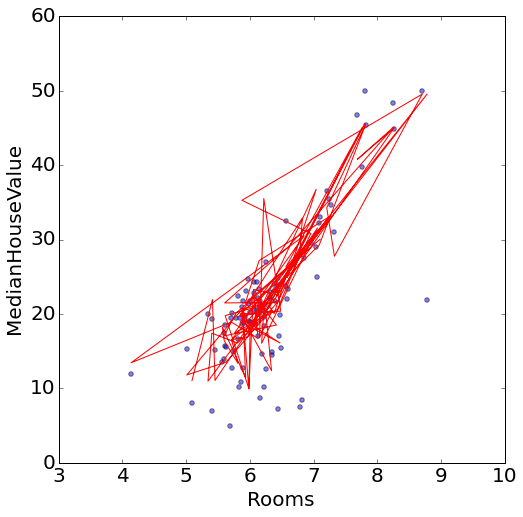

In [129]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('Rooms')
ax.set_ylabel('MedianHouseValue')
ax.scatter(XTest[independentVars], yTest, alpha=0.5)
ax.plot(XTest[independentVars], rfr.predict(XTest[independentVars]), label="r^2=" + str(r2), c="r")

Let's look to see what a linear regression gets in terms of RMSECV:

In [144]:
lm = skl.linear_model.LinearRegression()
lm.fit(XTrain[independentVars], yTrain)

lmRMSECV = np.sqrt(np.mean((lm.predict(XTest[independentVars]) - yTest) **2))
lmRMSECV

4.2214382284107872

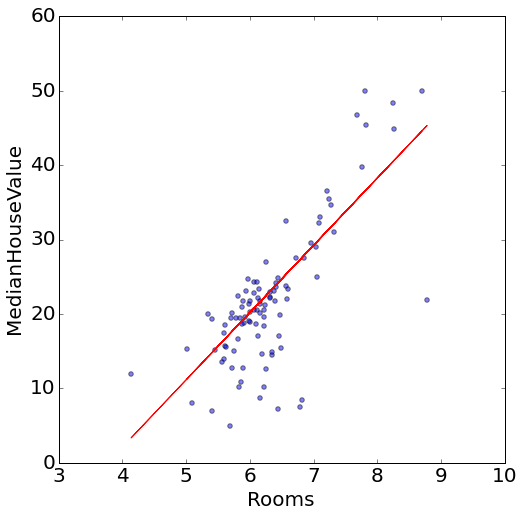

In [136]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('Rooms')
ax.set_ylabel('MedianHouseValue')
ax.scatter(XTest[independentVars], yTest, alpha=0.5)
ax.plot(XTest[independentVars], lm.predict(XTest[independentVars]), label="r^2=" + str(r2), c="r")